# Table of Contents
 <p><div class="lev1"><a href="#Importing-data">Importing data</a></div><div class="lev1"><a href="#Exploring-the-columns">Exploring the columns</a></div><div class="lev2"><a href="#Action-type-and-combined-shot-type">Action type and combined shot type</a></div><div class="lev2"><a href="#Game-event-and-game-IDs">Game event and game IDs</a></div><div class="lev2"><a href="#loc_x,-loc_y,-lat,-lon">loc_x, loc_y, lat, lon</a></div><div class="lev2"><a href="#Minutes-and-seconds-remaining">Minutes and seconds remaining</a></div><div class="lev2"><a href="#Period">Period</a></div><div class="lev2"><a href="#Playoffs">Playoffs</a></div><div class="lev2"><a href="#Shot-made-flag">Shot made flag</a></div><div class="lev2"><a href="#Season">Season</a></div><div class="lev2"><a href="#Shot-distance">Shot distance</a></div><div class="lev2"><a href="#Shot-type">Shot type</a></div><div class="lev2"><a href="#Shot-zone:-range,-area,-basic">Shot zone: range, area, basic</a></div><div class="lev2"><a href="#Team-ID-and-name">Team ID and name</a></div><div class="lev2"><a href="#Game-date">Game date</a></div><div class="lev2"><a href="#Matchup-and-opponent">Matchup and opponent</a></div><div class="lev2"><a href="#Shot-ID">Shot ID</a></div><div class="lev2"><a href="#Exploring-the-columns---summary">Exploring the columns - summary</a></div><div class="lev1"><a href="#Splitting-the-data">Splitting the data</a></div><div class="lev1"><a href="#Exploring-the-data">Exploring the data</a></div><div class="lev2"><a href="#Shot-accuracy">Shot accuracy</a></div><div class="lev2"><a href="#Shots-in-the-last-seconds-of-a-period">Shots in the last seconds of a period</a></div><div class="lev2"><a href="#Period-accuracy">Period accuracy</a></div><div class="lev2"><a href="#Accuracy-depending-on-shot-type">Accuracy depending on shot type</a></div><div class="lev3"><a href="#Combined-shot-type">Combined shot type</a></div><div class="lev3"><a href="#Action-type">Action type</a></div><div class="lev2"><a href="#Career-accuracy">Career accuracy</a></div><div class="lev2"><a href="#Season-freshness">Season freshness</a></div><div class="lev2"><a href="#Manic-Monday">Manic Monday</a></div><div class="lev2"><a href="#Regular-season-vs-playoffs">Regular season vs playoffs</a></div><div class="lev2"><a href="#Accuracy-depending-on-the-shot-distance">Accuracy depending on the shot distance</a></div><div class="lev2"><a href="#Accuracy-based-on-shot-zones">Accuracy based on shot zones</a></div><div class="lev3"><a href="#Shot-zone-area">Shot zone area</a></div><div class="lev3"><a href="#Shot-zone-basic">Shot zone basic</a></div><div class="lev2"><a href="#Home-game-vs-away">Home game vs away</a></div><div class="lev2"><a href="#Opponents">Opponents</a></div><div class="lev1"><a href="#Next-steps">Next steps</a></div>

# Importing data

First we'll import the data and check if everything was loaded ok.

In [159]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

df = pd.read_csv('../#data-sets/kobe_data.csv')
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [160]:
df.shape

(30697, 25)

# Exploring the columns

We'll explore the columns and see if we can modify or drop some of them.  
List of columns to drop will be in `not_needed` list.

In [161]:
random_sample = df.take(np.random.permutation(len(df))[:5])
random_sample.T

,14261,15659,27769,9806,4488
action_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Jump Shot
game_event_id,286,256,152,170,133
game_id,20800797,20900516,40500151,20600142,20200842
lat,34.0083,33.9583,33.9633,34.0343,33.8723
loc_x,190,-16,-59,54,-192
loc_y,36,86,81,10,172
lon,-118.08,-118.286,-118.329,-118.216,-118.462
minutes_remaining,7,0,7,7,11
period,3,2,2,2,2


In [162]:
not_needed = []

## Action type and combined shot type

In [163]:
print(df['action_type'].unique())
print(df['combined_shot_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

Let's keep both of them.

## Game event and game IDs

`game_event_id` and `game_id` won't be needed:

In [164]:
not_needed.extend(['game_event_id', 'game_id'])

## loc_x, loc_y, lat, lon

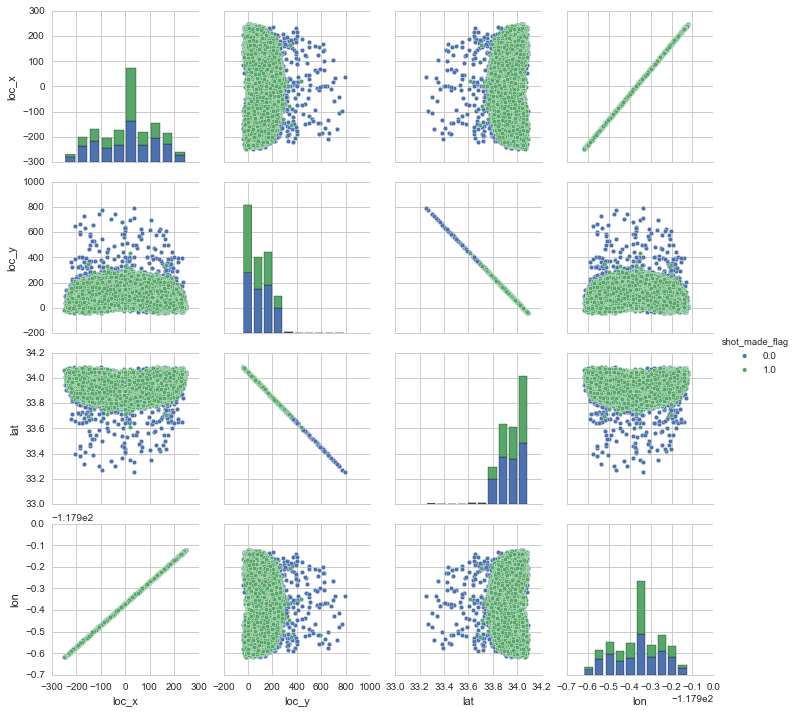

In [165]:
sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_made_flag')

`loc_x` and `lon` are correlated, also `loc_y` and `lat`, so we'll drop `lon` and `lat`.

In [166]:
not_needed.extend(['lon', 'lat'])

## Minutes and seconds remaining

`minutes_remaining` and `seconds_remaining` can be put in one column named `time_remaining`.

In [167]:
df['time_remaining'] = 60 * df.loc[:, 'minutes_remaining'] + df.loc[:, 'seconds_remaining']

In [168]:
not_needed.extend(['minutes_remaining', 'seconds_remaining'])

## Period

In [169]:
df['period'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

## Playoffs

In [170]:
df['playoffs'].unique()

array([0, 1], dtype=int64)

## Shot made flag

In [171]:
df['shot_made_flag'].unique()

array([ nan,   0.,   1.])

This will be the feature we're looking for, and later we'll split the data based on it.

## Season

In `season` column, we'll just keep the year when season started and convert column to integer.

In [172]:
df['season'] = df['season'].apply(lambda x: x[:4])
df['season'] = pd.to_numeric(df['season'])

## Shot distance

In [173]:
dist = pd.DataFrame({'true_dist': np.sqrt((df['loc_x']/10)**2 + (df['loc_y']/10)**2), 
                     'shot_dist': df['shot_distance']})
dist[:10]

,shot_dist,true_dist
0,18,18.185984
1,15,15.700000
2,16,16.860012
3,22,22.286543
4,0,0.000000
5,14,14.541664
6,0,0.000000
7,2,2.801785
8,12,12.605158
9,12,12.928264


Seems like `shot_distance` is just floored distance calculated from x- and y- location of a shot, so we'll use more precise measure and drop floored one.

In [174]:
df['shot_distance_'] = dist['true_dist']
not_needed.append('shot_distance')

## Shot type

In [175]:
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

We can create a new column `3pt_goal` which will have values `1` for 3pt goal and `0` for 2pt goal, and then drop `shot_type` column.

In [176]:
df['3pt_goal'] = df['shot_type'].str.contains('3PT').astype('int')
not_needed.append('shot_type')

## Shot zone: range, area, basic

In [177]:
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


`shot_zone_range` is just putting `shot_distance` in 5 bins. Don't need it.

In [178]:
not_needed.append('shot_zone_range')

Let's visualize `shot_zone_area` and `shot_zone_basic`.  
We'll put `loc_y = 0` near the top, so right and left sides show correctly in the graph.

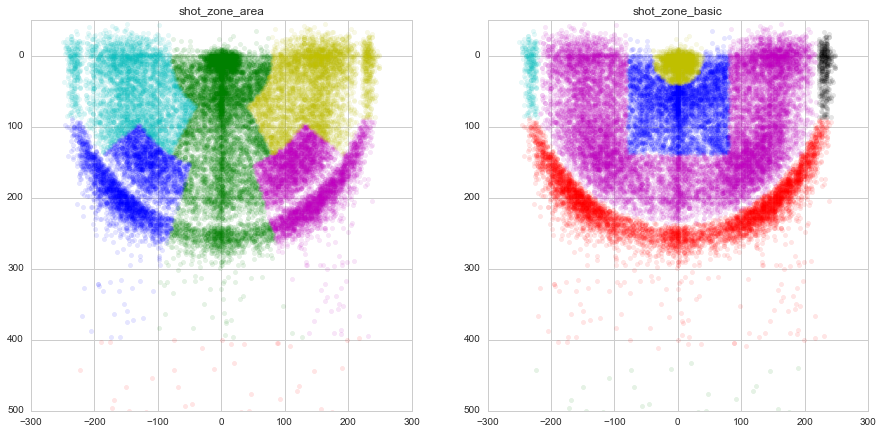

In [179]:
area_group = df.groupby('shot_zone_area')
basic_group = df.groupby('shot_zone_basic')

plt.subplots(1, 2, figsize=(15, 7), sharey=True)
colors = list('rgbcmyk')

plt.subplot(121)
plt.ylim(500, -50)
plt.title('shot_zone_area')
for i, (_, area) in enumerate(area_group):
    plt.scatter(area['loc_x'], area['loc_y'], alpha=0.1, color=colors[i])
    
plt.subplot(122)
plt.ylim(500, -50)
plt.title('shot_zone_basic')
for i, (_, basic) in enumerate(basic_group):
    plt.scatter(basic['loc_x'], basic['loc_y'], alpha=0.1, color=colors[i])

## Team ID and name

In [180]:
print(df['team_id'].unique())
print(df['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


Those two columns are the same for all entries, so we can drop them.

In [181]:
not_needed.extend(['team_id', 'team_name'])

## Game date

We'll convert `game_date` to datetime format, and then split it to year, month and weekday (0 = Monday, 6 = Sunday), so it won't be needed anymore.

In [182]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek

not_needed.append('game_date')

## Matchup and opponent

`matchup` and `opponent` columns give as almost the same data - matchup tells us if the game was home or away (depending if it is '@' or 'vs'), so we'll make a new column with that info and then we can drop `matchup` column.

In [184]:
df['home_game'] = df['matchup'].str.contains('vs.').astype(int)
not_needed.append('matchup')

## Shot ID

We can set `shot_id` as index:

In [187]:
df.set_index('shot_id', inplace=True)

## Exploring the columns - summary

Let's finally drop all not needed columns:

In [188]:
df = df.drop(not_needed, axis=1)

In [189]:
df.shape

(30697, 18)

In [190]:
pd.set_option('display.max_columns', None)
random_sample = df.take(np.random.permutation(len(df))[:10])
random_sample.head(10)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_made_flag,shot_zone_area,shot_zone_basic,opponent,time_remaining,shot_distance_,3pt_goal,game_year,game_month,game_day,home_game
shot_id,,,,,,,,,,,,,,,,,,
4616,Jump Shot,Jump Shot,-202,28,2,0,2002,0.0,Left Side(L),Mid-Range,DET,235,20.393136,0,2003,3,2,0
9950,Jump Shot,Jump Shot,-79,245,4,0,2006,0.0,Center(C),Above the Break 3,LAC,357,25.742183,1,2006,12,5,0
9797,Jump Shot,Jump Shot,-148,110,3,0,2006,0.0,Left Side Center(LC),Mid-Range,TOR,250,18.440174,0,2006,11,4,1
3083,Alley Oop Dunk Shot,Dunk,0,0,3,0,2001,1.0,Center(C),Restricted Area,SEA,281,0.000000,0,2002,4,0,1
13543,Jump Shot,Jump Shot,80,192,1,0,2008,0.0,Right Side Center(RC),Mid-Range,PHX,576,20.800000,0,2008,12,2,1
2404,Jump Shot,Jump Shot,132,112,1,0,2001,0.0,Right Side Center(RC),Mid-Range,DAL,566,17.311268,0,2002,2,6,0
27412,Fadeaway Jump Shot,Jump Shot,123,48,2,1,2003,0.0,Right Side(R),Mid-Range,SAS,554,13.203409,0,2004,5,6,0
21537,Jump Shot,Jump Shot,-98,162,3,0,2014,0.0,Left Side Center(LC),Mid-Range,NOP,367,18.933568,0,2014,12,6,1
14226,Jump Shot,Jump Shot,23,148,1,0,2008,1.0,Center(C),Mid-Range,UTA,394,14.977650,0,2009,2,2,0


&nbsp;

---

&nbsp;

# Splitting the data

`submission_data` are those shots where we don't know if he scored or not, and shots where we'll test accuracy of our model.

In [121]:
submission_data = df[df['shot_made_flag'].isnull()]
submission_data = submission_data.drop('shot_made_flag', 1)
submission_data.shape

(5000, 17)

In [122]:
data = df[df['shot_made_flag'].notnull()]
data.shape

(25697, 18)

&nbsp;

---

&nbsp;

# Exploring the data

## Shot accuracy

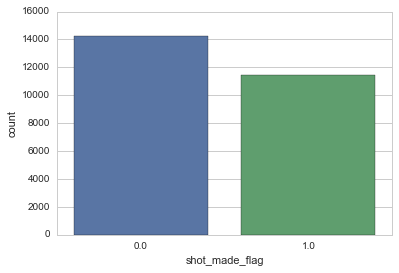

In [123]:
sns.countplot(x='shot_made_flag', data=data)

In [124]:
data['shot_made_flag'].value_counts() / data['shot_made_flag'].shape

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

He scores around 45% of his shots.

Let's see his attempts depending on the seconds to the end of a period:

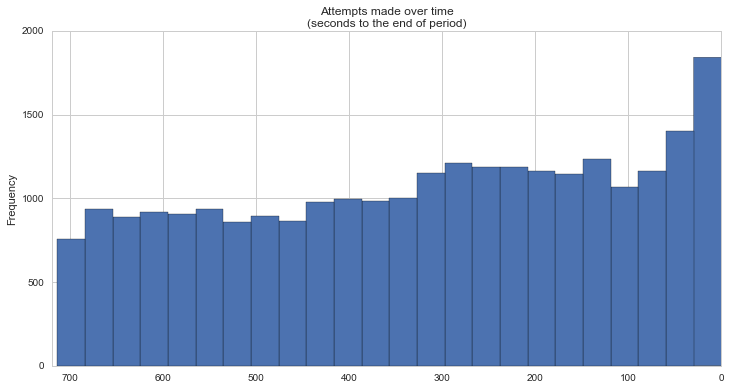

In [125]:
data['time_remaining'].plot(kind='hist', bins=24, xlim=(720, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

Accuracy of those shots:

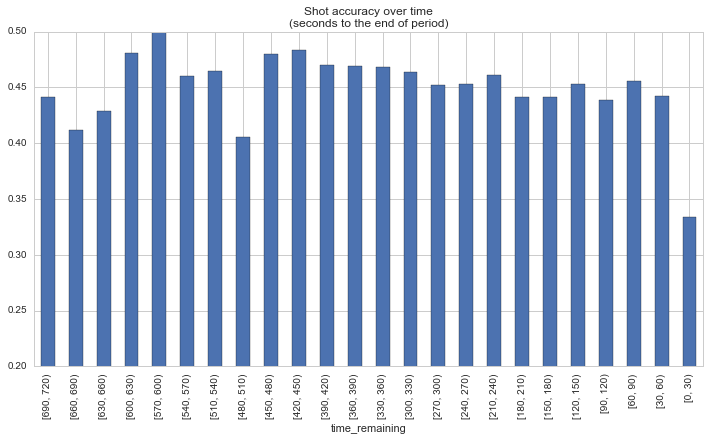

In [126]:
time_bins = np.arange(0, 721, 30)
attempts_in_time = pd.cut(data['time_remaining'], time_bins, right=False)
grouped = data.groupby(attempts_in_time)
prec = grouped['shot_made_flag'].mean()

prec[::-1].plot(kind='bar', figsize=(12, 6), ylim=(0.2, 0.5), 
                title='Shot accuracy over time\n(seconds to the end of period)')

Lots of attempts in last 30 seconds, and much worse accuracy than usual. Let's explore that more.

## Shots in the last seconds of a period

In [127]:
last_30 = data[data['time_remaining'] < 30]
last_30['shot_made_flag'].value_counts() / last_30['shot_made_flag'].shape

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

In the last 30 seconds he scores only about 33% of his shots. Pressure?

Let's explore what happens in those last minutes of the game.

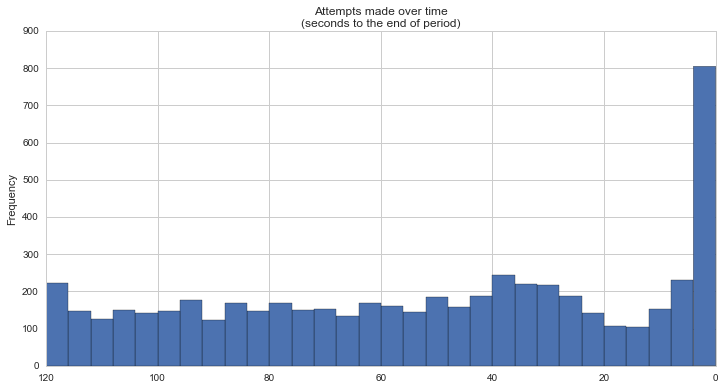

In [128]:
last_2min = data[data['time_remaining'] <= 120]

last_2min['time_remaining'].plot(kind='hist', bins=30, xlim=(120, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

Ok, this explains things a bit. Plenty of last seconds desperate shots. Let's return to last 30 seconds.

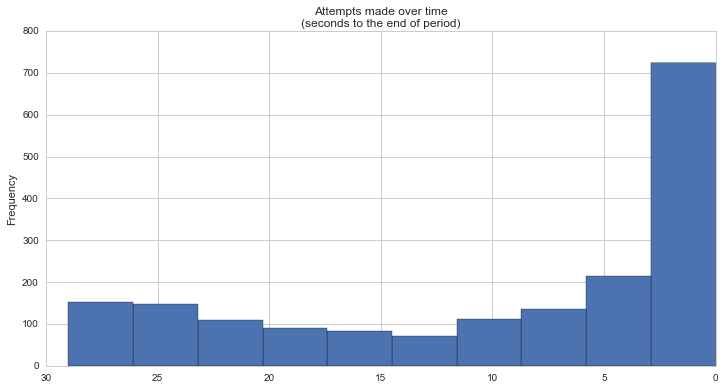

In [129]:
last_30['time_remaining'].plot(kind='hist', bins=10, xlim=(30, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

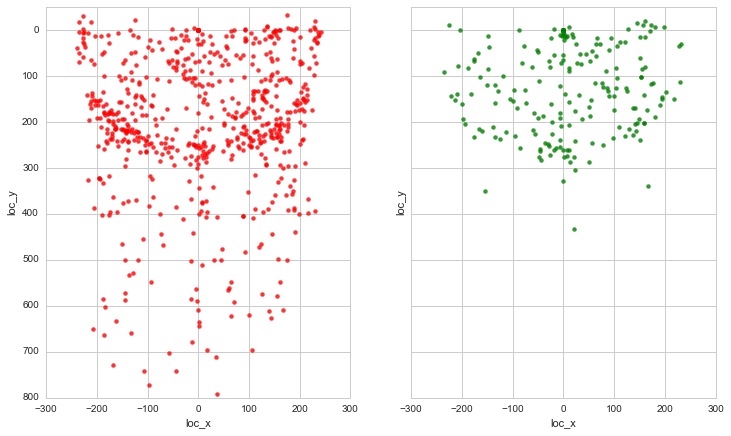

In [130]:
last_5sec_misses = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 0)]
last_5sec_scores = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 1)]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=last_5sec_misses, fit_reg=False, ax=ax1, color='r')
sns.regplot(x='loc_x', y='loc_y', data=last_5sec_scores, fit_reg=False, ax=ax2, color='g')

In last 5 seconds, there are some desperate shots from far away, plenty of misses from 3pt line, but he misses a lot even from close distance.

In [131]:
last_5sec_close = data[(data['time_remaining'] <= 5) & (data['shot_distance_'] <= 20)]

last_5sec_close['shot_made_flag'].value_counts() / last_5sec_close['shot_made_flag'].shape

0.0    0.604317
1.0    0.395683
Name: shot_made_flag, dtype: float64

For comparison, accuracy from close distance when there are more than 5 seconds to go:

In [132]:
close_shots = data[(data['time_remaining'] > 5) & (data['shot_distance_'] <= 20)]

close_shots['shot_made_flag'].value_counts() / close_shots['shot_made_flag'].shape

0.0    0.512264
1.0    0.487736
Name: shot_made_flag, dtype: float64

## Period accuracy

Number of shots taken in each period:

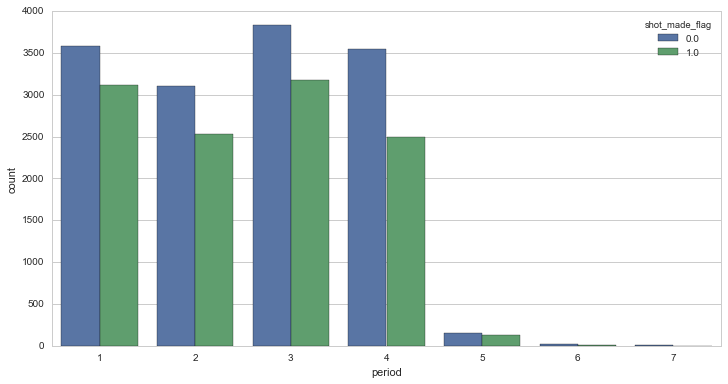

In [133]:
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=data)

Their accuracy:

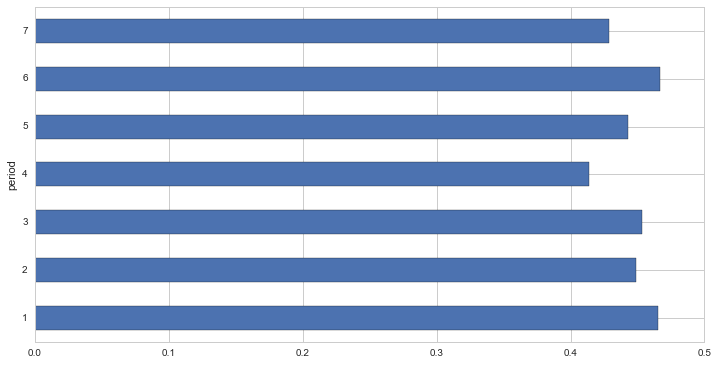

In [134]:
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

Seems like a period of a game doesn't influence much his accuracy.

## Accuracy depending on shot type

### Combined shot type

Number of different kinds of shots:

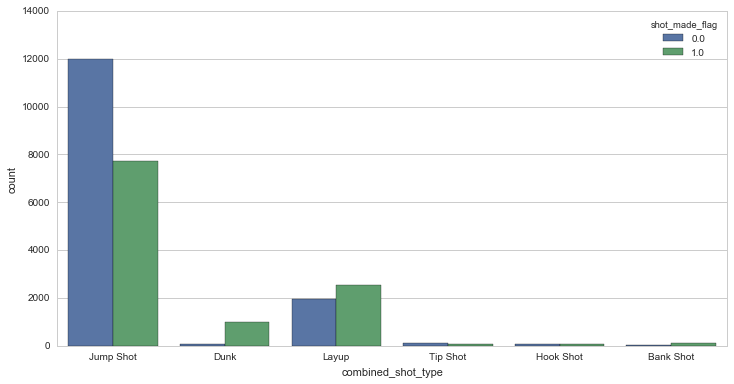

In [135]:
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)

Their accuracy:

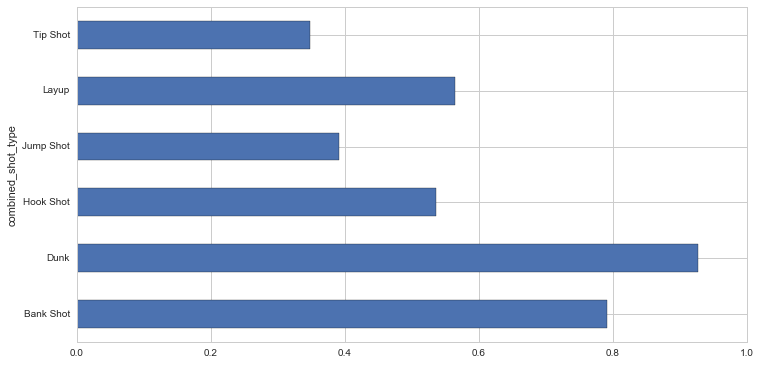

In [136]:
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

### Action type

Number of shots:

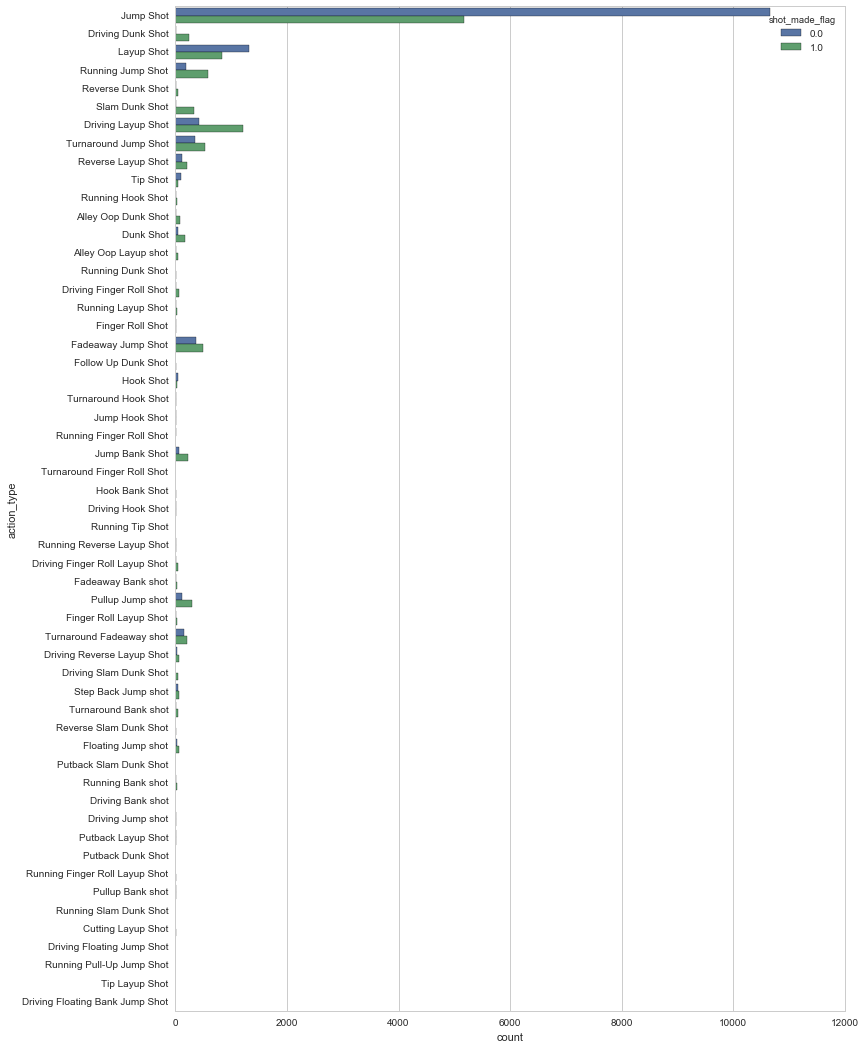

In [137]:
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

Accuracy:

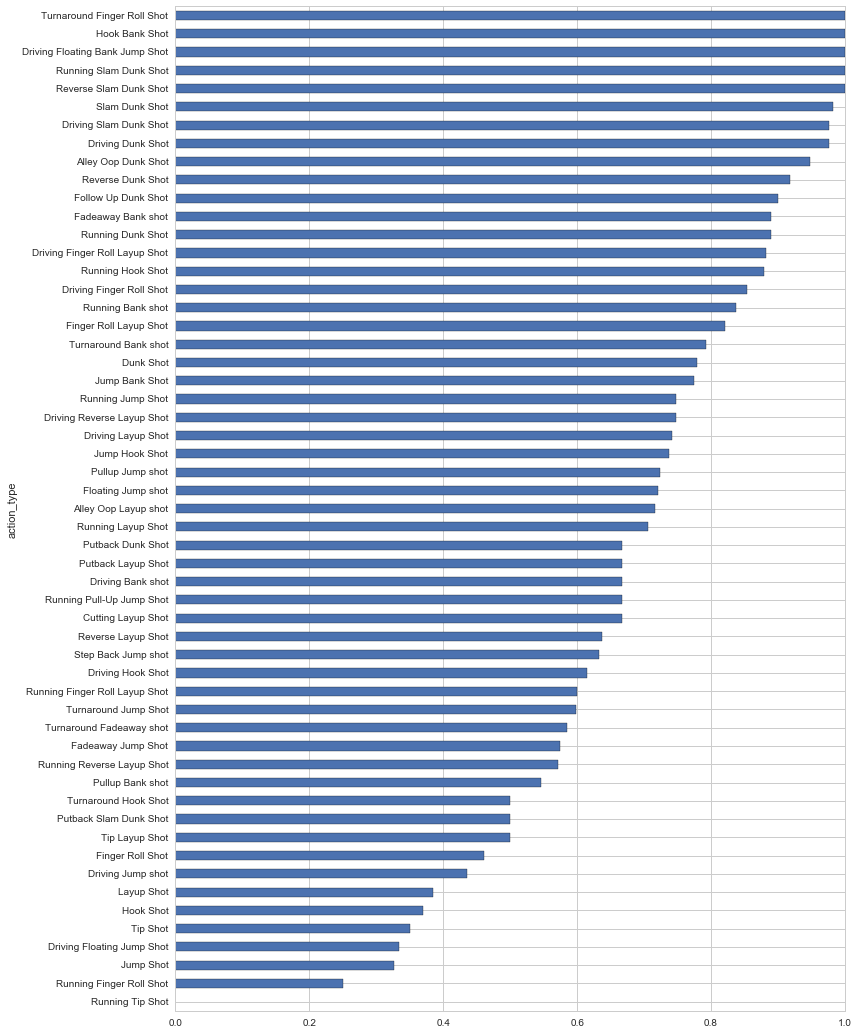

In [138]:
action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

## Career accuracy

Number of shots over seasons:

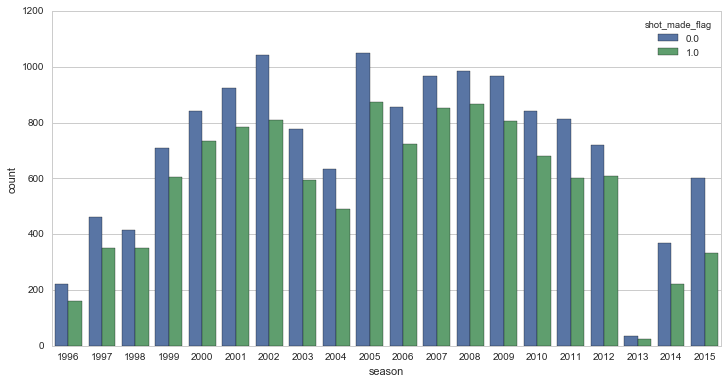

In [139]:
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

Accuracy over seasons:

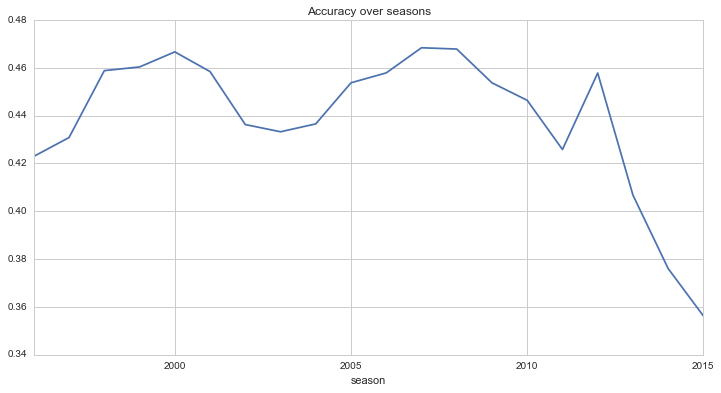

In [140]:
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

Some Wikipedia insight on what happened with season 2013-14, and possible explanation for the big decline in his last seasons:

*On April 12 [2013], Bryant suffered a **torn Achilles tendon** against the Golden State Warriors, ending his [2012-13] season. (...) Bryant resumed practicing starting in November, after the start of the 2013–14 season. (...)  
Bryant resumed playing on December 8 [2013] after missing the season's first 19 games. On December 17, Bryant matched his season high of 21 points in a 96–92 win over Memphis, but he suffered a **lateral tibial plateau fracture** in his left knee that was expected to sideline him for six weeks. (...)  
On March 12, 2014, the Lakers **ruled Bryant out for the remainder of the season**, citing his need for more rehab and the limited time remaining in the season.*

So I guess he never fully recovered from his injuries, at least when it comes to shot accuracy.

## Season freshness

Number of shots each month:

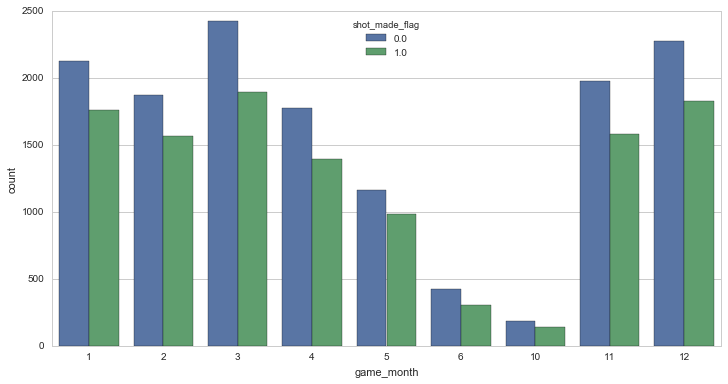

In [141]:
plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=data)

Shot accuracy each month:

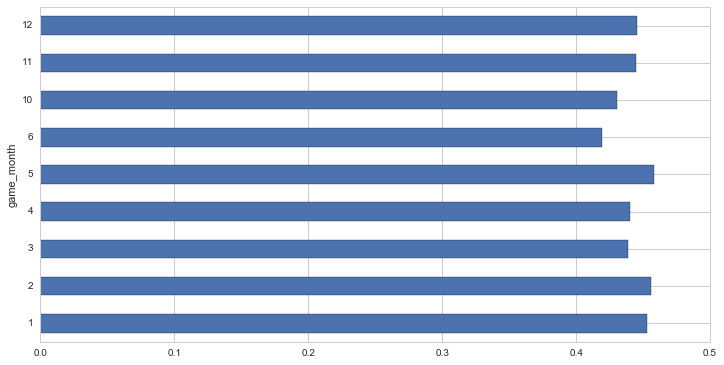

In [142]:
game_month = data['shot_made_flag'].groupby(data['game_month']).mean()
game_month.plot(kind='barh', figsize=(12, 6))

Almost the same performance troughout the season - just slightly worse accuracy at the start (month 10) and at the end (month 6) of the season, but those months have much less games than other months.

## Manic Monday

Month of a year doesn't affect him, but what about weekday?

Number of shots per weekday:

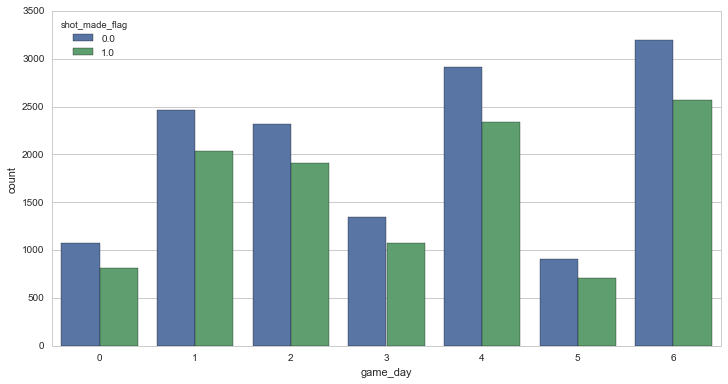

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

Accuracy by weekday:

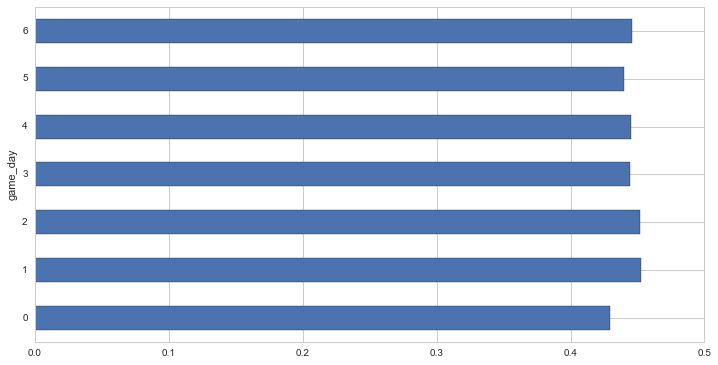

In [144]:
7
game_day.plot(kind='barh', figsize=(12, 6))

Again no noticeable difference.

## Regular season vs playoffs

Number of shots:

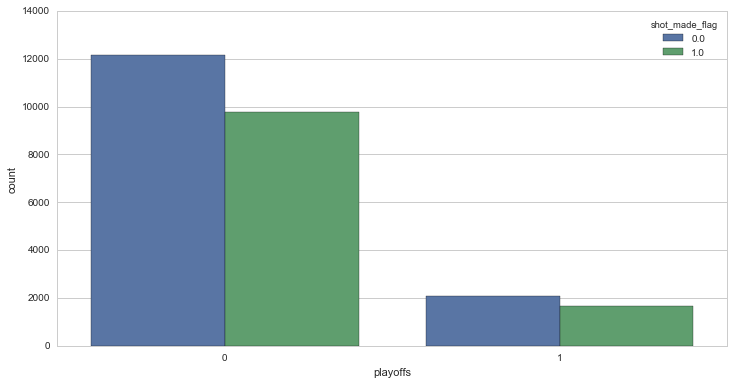

In [145]:
plt.figure(figsize=(12,6))
sns.countplot(x="playoffs", hue="shot_made_flag", data=data)

Accuracy:

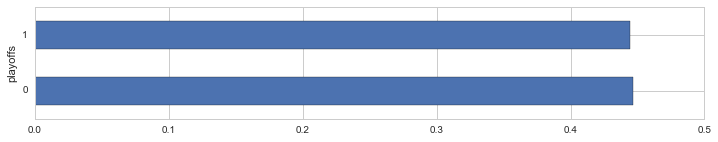

In [146]:
playoffs = data['shot_made_flag'].groupby(data['playoffs']).mean()
playoffs.plot(kind='barh', figsize=(12, 2), xlim=(0, 0.50))

No difference between regular season and playoffs.

## Accuracy depending on the shot distance

First let's create categories of distances, each 3ft long.

In [147]:
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(data['shot_distance_'], distance_bins, right=False)

dist_data = data.loc[:, ['shot_distance_', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

[0, 3)       5613
[3, 6)       1080
[6, 9)       1728
[9, 12)      1718
[12, 15)     2324
[15, 18)     3362
[18, 21)     3319
[21, 24)     1735
[24, 27)     3954
[27, 30)      683
[30, 300)     181
dtype: int64

Number of shots in each distance category:

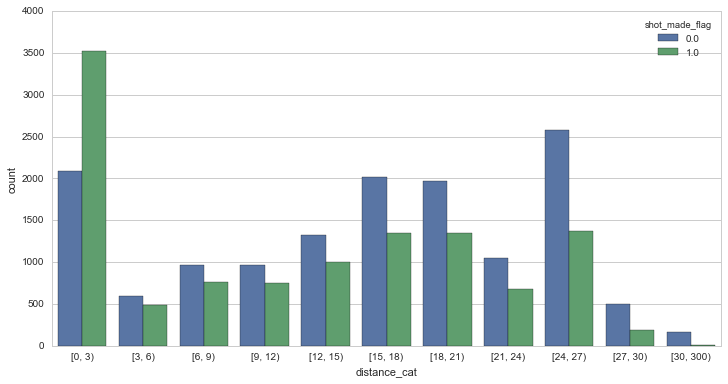

In [148]:
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

Small number of shots in [21, 24) because that's just inside of 3pt line - better to step outside and try going for 3pt.

Accuracy by distance category:

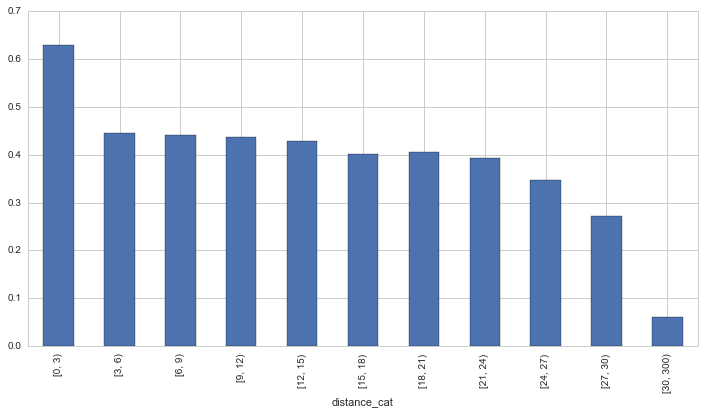

In [149]:
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

## Accuracy based on shot zones

For the difference between `shot_zone_area` and `shot_zone_basic` see [here](#Shot-zone:-range,-area,-basic).

### Shot zone area

Number of shots:

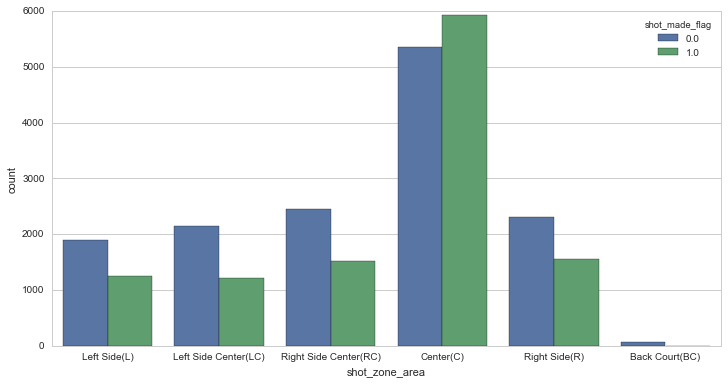

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

Accuracy:

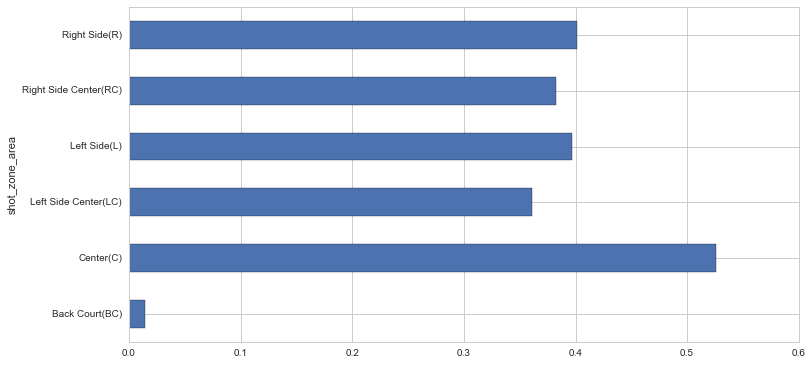

In [151]:
shot_area = data['shot_made_flag'].groupby(data['shot_zone_area']).mean()
shot_area.plot(kind='barh', figsize=(12, 6))

He's most accurate from the center, but what's interesting is that he's slightly more accurate from the right side.

### Shot zone basic

Number of shots:

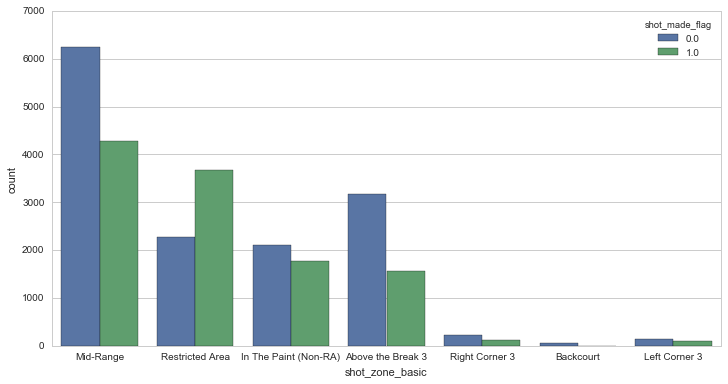

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data)

Accuracy:

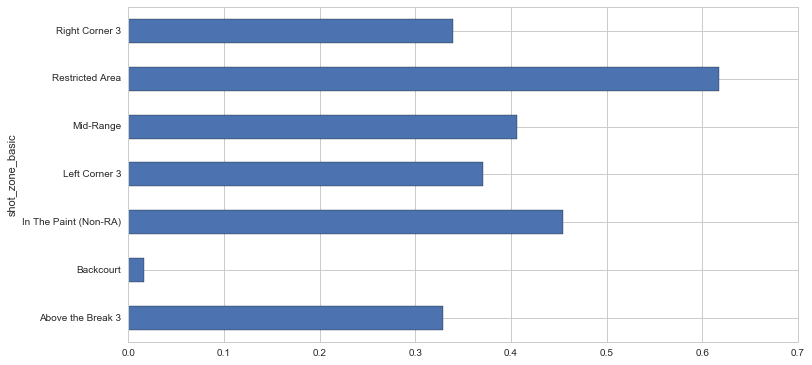

In [153]:
shot_basic = data['shot_made_flag'].groupby(data['shot_zone_basic']).mean()
shot_basic.plot(kind='barh', figsize=(12, 6))

We have seen that he's more accurate from right-hand side, but when it comes to corners - left corner suits him slightly better.

## Home game vs away

Number of shots:

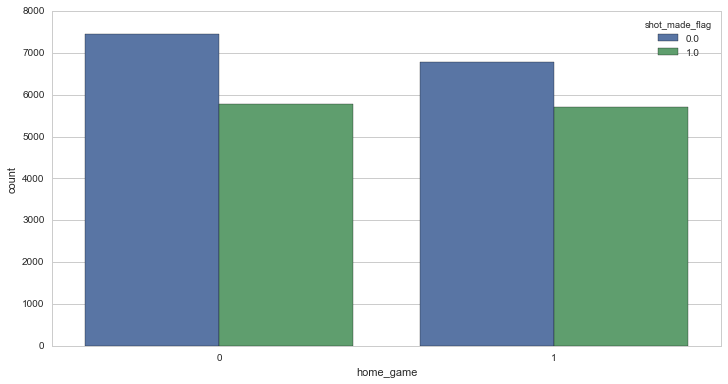

In [154]:
plt.figure(figsize=(12,6))
sns.countplot(x="home_game", hue="shot_made_flag", data=data)

Accuracy:

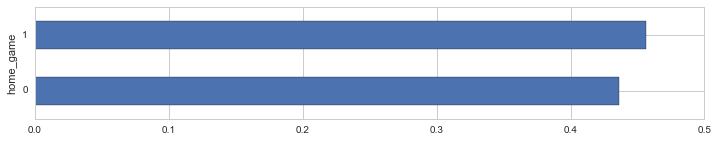

In [155]:
shot_basic = data['shot_made_flag'].groupby(data['home_game']).mean()
shot_basic.plot(kind='barh', figsize=(12, 2))

Slightly more accurate in front of his home crowd.

## Opponents

Number of shots:

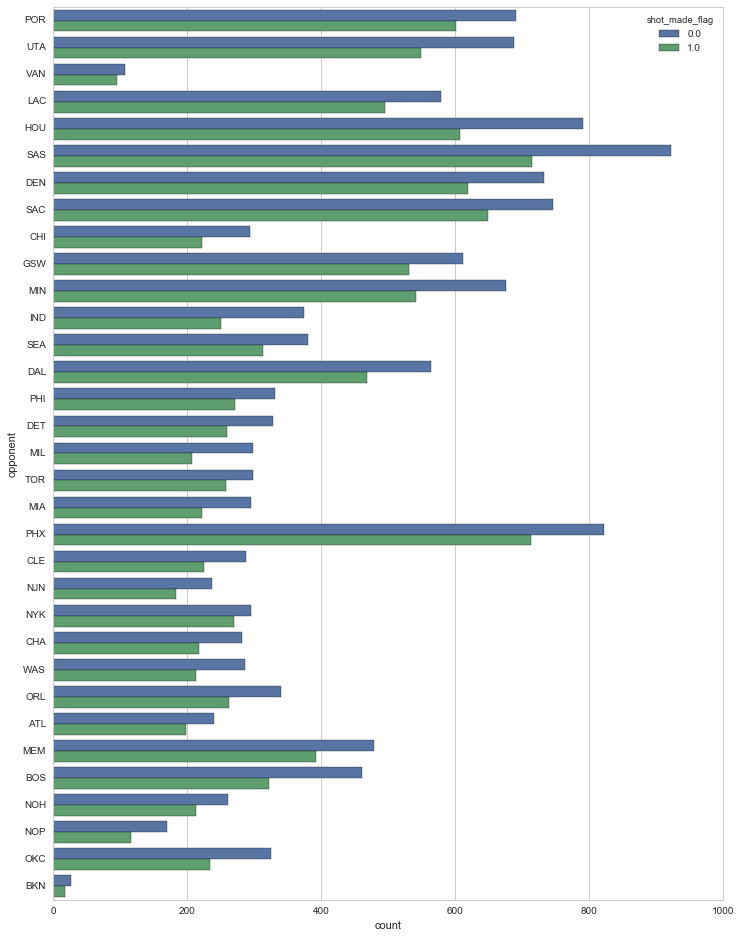

In [156]:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

Accuracy:

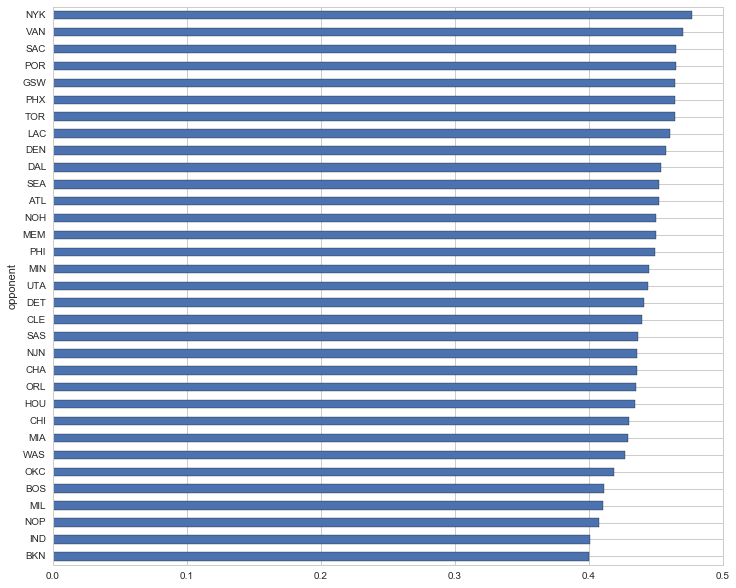

In [157]:
opponent = data['shot_made_flag'].groupby(data['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(12,10))

In [158]:
df.to_csv('../#data-sets/kobe_data_2.csv')

# Next steps

Continuation of this notebook is [here](./kobe-part2.ipynb).